In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\programdata\anaconda3\lib\site-packages
Requires: matplotlib, numpy, scipy, pandas
Required-by: missingno


In [3]:
!pip show pandas

Name: pandas
Version: 1.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: visions, statsmodels, seaborn, phik, pandas-datareader


In [4]:
# Disply all Columns
pd.options.display.max_columns=15
# sns.set_style()


In [5]:
Box_office = pd.read_csv('box_office_predictions.csv') 
Box_office.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [6]:
print("Old Column Names:\n", Box_office.columns) 

Old Column Names:
 Index(['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
       'runtime', 'score', 'star', 'studio', 'votes'],
      dtype='object')


In [7]:
Box_office.shape

(6000, 12)

In [8]:
Box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6000 non-null   float64
 1   country   6000 non-null   object 
 2   director  6000 non-null   object 
 3   genre     6000 non-null   object 
 4   gross     6000 non-null   float64
 5   name      6000 non-null   object 
 6   rating    6000 non-null   object 
 7   runtime   6000 non-null   int64  
 8   score     6000 non-null   float64
 9   star      6000 non-null   object 
 10  studio    6000 non-null   object 
 11  votes     6000 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 562.6+ KB


In [9]:
len(Box_office)

6000

In [10]:
Box_office.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,6000.0,2.469918e+07,3.721710e+07,0.0,0.00,11000000.0,32625000.00,300000000.0
gross,6000.0,3.341635e+07,5.735205e+07,441.0,1527796.50,12298970.0,40072560.50,760507625.0
runtime,6000.0,1.065870e+02,1.802689e+01,50.0,95.00,102.0,115.00,366.0
score,6000.0,6.386383e+00,9.949211e-01,1.5,5.80,6.5,7.10,9.3
votes,6000.0,7.188537e+04,1.308033e+05,27.0,7791.75,26601.5,76774.75,1868308.0


In [11]:
newdf = Box_office.select_dtypes(include= np.number)
newdf
#isNumeric = is_numeric(Box_office)

,budget,gross,runtime,score,votes
0,237000000.0,760507625.0,162,7.8,958400
1,200000000.0,658672302.0,194,7.8,865551
2,150000000.0,652270625.0,124,7.0,470625
3,220000000.0,623357910.0,143,8.1,1069292
4,185000000.0,534858444.0,152,9.0,1845853
...,...,...,...,...,...
5995,0.0,1143.0,103,6.5,4557
5996,0.0,828.0,88,6.4,5540
5997,0.0,547.0,104,7.2,16674
5998,0.0,542.0,89,6.2,9055


In [12]:
Box_office

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557
5996,0.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540
5997,0.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674
5998,0.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055


In [13]:
Box_office.groupby('gross').agg(['count','mean','std','min','max','median']).T.head(12)

gross           441.0        542.0        547.0        828.0        \
budget  count           1.0          1.0          1.0          1.0   
        mean            0.0          0.0          0.0          0.0   
        std             NaN          NaN          NaN          NaN   
        min             0.0          0.0          0.0          0.0   
        max             0.0          0.0          0.0          0.0   
        median          0.0          0.0          0.0          0.0   
runtime count           1.0          1.0          1.0          1.0   
        mean          106.0         89.0        104.0         88.0   
        std             NaN          NaN          NaN          NaN   
        min           106.0         89.0        104.0         88.0   
        max           106.0         89.0        104.0         88.0   
        median        106.0         89.0        104.0         88.0   

gross           1143.0       1201.0       1242.0       ...  474544677.0  \
budget  count           1.0          1.0          1.0  ...          1.0   
        mean            0.0          0.0          0.0  ...  115000000.0   
        std             NaN          NaN          NaN  ...          NaN   
        min             0.0          0.0          0.0  ...  115000000.0   
        max             0.0          0.0          0.0  ...  115000000.0   
        median          0.0          0.0          0.0  ...  115000000.0   
runtime count           1.0          1.0          1.0  ...          1.0   
        mean          103.0        100.0         87.0  ...        136.0   
        std             NaN          NaN          NaN  ...          NaN   
        min           103.0        100.0         87.0  ...        136.0   
        max           103.0        100.0         87.0  ...        136.0   
        median        103.0        100.0         87.0  ...        136.0   

gross           532177324.0  534858444.0  623357910.0  652270625.0  \
budget  count           1.0          1.0          1.0          1.0   
        mean    200000000.0  185000000.0  220000000.0  150000000.0   
        std             NaN          NaN          NaN          NaN   
        min     200000000.0  185000000.0  220000000.0  150000000.0   
        max     200000000.0  185000000.0  220000000.0  150000000.0   
        median  200000000.0  185000000.0  220000000.0  150000000.0   
runtime count           1.0          1.0          1.0          1.0   
        mean          133.0        152.0        143.0        124.0   
        std             NaN          NaN          NaN          NaN   
        min           133.0        152.0        143.0        124.0   
        max           133.0        152.0        143.0        124.0   
        median        133.0        152.0        143.0        124.0   

gross           658672302.0  760507625.0  
budget  count           1.0          1.0  
        mean    200000000.0  237000000.0  
        std             NaN          NaN  
        min     200000000.0  237000000.0  
        max     200000000.0  237000000.0  
        median  200000000.0  237000000.0  
runtime count           1.0          1.0  
        mean          194.0        162.0  
        std             NaN          NaN  
        min           194.0        162.0  
        max           194.0        162.0  
        median        194.0        162.0  

[12 rows x 5987 columns]

In [14]:
Box_office.describe(include=['object', 'bool', 'category']) # looking at object, bool & categorical data

,country,director,genre,name,rating,star,studio
count,6000,6000,6000,6000,6000,6000,6000
unique,52,2549,17,6000,13,2317,1996
top,USA,Woody Allen,Comedy,El cliente (2016),R,Nicolas Cage,Universal Pictures
freq,4281,29,1818,1,3009,38,269


In [15]:
print(Box_office['rating'].unique())

['PG-13' 'PG' 'G' 'R' 'Not specified' 'NC-17' 'UNRATED' 'NOT RATED'
 'TV-PG' 'B' 'TV-14' 'TV-MA' 'B15']


In [16]:
Box_office['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
B                   1
TV-MA               1
TV-PG               1
B15                 1
TV-14               1
Name: rating, dtype: int64

In [17]:
print(Box_office['genre'].unique())

['Action' 'Drama' 'Animation' 'Adventure' 'Comedy' 'Biography' 'Mystery'
 'Crime' 'Horror' 'Sci-Fi' 'Fantasy' 'Romance' 'Thriller' 'Family'
 'Western' 'Musical' 'War']


In [18]:
Box_office['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
War             2
Western         2
Name: genre, dtype: int64

In [19]:
Box_office['budget'].value_counts()

0.0           1911
20000000.0     166
30000000.0     164
25000000.0     160
15000000.0     152
              ... 
9600000.0        1
6428966.0        1
300000.0         1
34200000.0       1
17080000.0       1
Name: budget, Length: 338, dtype: int64

In [20]:
#Profit = Box_office["gross"] - Box_office["budget"]
#Profit

In [21]:
Box_office_v2 = Box_office.copy()
Box_office_v2.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853


In [22]:
Profit = Box_office["gross"] - Box_office["budget"]
Profit

0       523507625.0
1       458672302.0
2       502270625.0
3       403357910.0
4       349858444.0
           ...     
5995         1143.0
5996          828.0
5997          547.0
5998          542.0
5999          441.0
Length: 6000, dtype: float64

In [23]:
ROI = ((Box_office['gross']- Box_office["budget"])/ Box_office["budget"])
ROI

0       2.208893
1       2.293362
2       3.348471
3       1.833445
4       1.891127
          ...   
5995         inf
5996         inf
5997         inf
5998         inf
5999         inf
Length: 6000, dtype: float64

In [24]:
#del Box_office_v2['ROI_in_%']
#del Box_office_v2['Profit_>95%']

In [25]:
Box_office_v2['Profit'] = Profit
Box_office_v2['ROI_in_$'] = ROI

In [26]:
Box_office_v2.head()

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI_in_$
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,2.208893
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,2.293362
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,3.348471
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1.833445
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,1.891127


In [27]:
i = 0.95
Box_office_v2.loc[Box_office_v2['ROI_in_$']>=i, 'Profit_>95%'] = '1'
Box_office_v2.loc[Box_office_v2['ROI_in_$']< i, 'Profit_>95%'] = '0'

In [28]:
Box_office_v2

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI_in_$,Profit_>95%
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,2.208893,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,2.293362,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,3.348471,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1.833445,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,1.891127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557,1143.0,inf,1
5996,0.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540,828.0,inf,1
5997,0.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674,547.0,inf,1
5998,0.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055,542.0,inf,1


In [29]:
print(Box_office_v2['budget'].unique())

[2.3700000e+08 2.0000000e+08 1.5000000e+08 2.2000000e+08 1.8500000e+08
 1.1500000e+08 2.5000000e+08 1.3000000e+08 2.2500000e+08 7.8000000e+07
 1.3900000e+08 6.3000000e+07 1.2500000e+08 9.4000000e+07 1.1300000e+08
 3.0000000e+07 7.6000000e+07 1.7500000e+08 5.8000000e+07 1.9000000e+08
 1.9500000e+08 5.8800000e+07 2.5800000e+08 7.4000000e+07 1.7000000e+08
 5.5000000e+07 1.6000000e+08 1.4000000e+08 9.3000000e+07 4.5000000e+07
 3.0000000e+08 7.5000000e+07 1.8000000e+08 6.8000000e+07 5.0000000e+07
 0.0000000e+00 4.0000000e+07 1.2000000e+08 1.1000000e+08 8.0000000e+07
 1.0000000e+08 2.3000000e+08 9.2000000e+07 1.2300000e+08 2.9000000e+07
 6.9000000e+07 3.5000000e+07 9.0000000e+07 8.1000000e+07 5.0000000e+06
 1.6500000e+08 2.1500000e+08 2.1000000e+08 1.3200000e+08 7.3000000e+07
 1.0800000e+08 7.2000000e+07 2.5000000e+07 2.0700000e+08 2.2000000e+07
 2.8000000e+07 6.0000000e+07 7.0000000e+07 1.4500000e+08 6.5000000e+07
 3.3000000e+07 1.0200000e+08 9.8000000e+07 9.5000000e+07 2.6000000e+08
 2.090

In [30]:
Box_office_v2['budget'].value_counts()

0.0           1911
20000000.0     166
30000000.0     164
25000000.0     160
15000000.0     152
              ... 
9600000.0        1
6428966.0        1
300000.0         1
34200000.0       1
17080000.0       1
Name: budget, Length: 338, dtype: int64

In [31]:
Box_office_v2['Profit_>95%'].value_counts()

0    3049
1    2951
Name: Profit_>95%, dtype: int64

In [32]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       6000 non-null   float64
 1   country      6000 non-null   object 
 2   director     6000 non-null   object 
 3   genre        6000 non-null   object 
 4   gross        6000 non-null   float64
 5   name         6000 non-null   object 
 6   rating       6000 non-null   object 
 7   runtime      6000 non-null   int64  
 8   score        6000 non-null   float64
 9   star         6000 non-null   object 
 10  studio       6000 non-null   object 
 11  votes        6000 non-null   int64  
 12  Profit       6000 non-null   float64
 13  ROI_in_$     6000 non-null   float64
 14  Profit_>95%  6000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 703.2+ KB


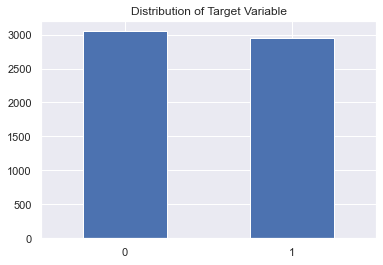

In [33]:
(Box_office_v2['Profit_>95%'].value_counts().plot(kind='bar',title='Distribution of Target Variable', x= 'budget',
                                             y= 'Profit>95%', rot=0)
);
#plt.show()

In [34]:
Box_office_v2['Profit_>95%'].value_counts(normalize=True)

0    0.508167
1    0.491833
Name: Profit_>95%, dtype: float64

In [35]:
#Box_office_plot = Box_office_v2.plot.bar(x='budget', y= 'Profit_>95%', rot=0,title='Distribution of Target Variable')

In [36]:
# !pip show seaborn
# !pip install seaborn --upgrade

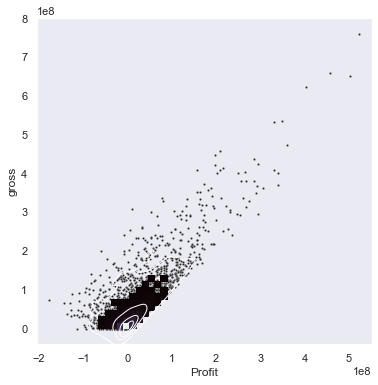

In [37]:
sns.set_theme(style="dark")
# sns.set_style(style = "dark")
#Box_office_v2
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data= Box_office_v2, x=Box_office_v2['Profit'], y= Box_office_v2['gross'],
                s=5, color=".15")
sns.histplot(data=  Box_office_v2, x=Box_office_v2['Profit'], y= Box_office_v2['gross'],
             bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(data=  Box_office_v2, x=Box_office_v2['Profit'], y= Box_office_v2['gross'],
            levels=5,color="w", linewidths=1)

In [38]:
Box_office_v2['Profit_>95%'].mean()

inf

In [39]:
Box_office_v2['Profit_>95%'].median()

0.0

In [40]:
Box_office_v2['Profit_>95%'].mode()

0    0
dtype: object

In [41]:
Box_office_v2[Box_office_v2['Profit_>95%']==1].mean()

budget         NaN
country        NaN
director       NaN
genre          NaN
gross          NaN
name           NaN
rating         NaN
runtime        NaN
score          NaN
star           NaN
studio         NaN
votes          NaN
Profit         NaN
ROI_in_$       NaN
Profit_>95%    NaN
dtype: object

In [42]:
Box_office_v2.apply(np.max) 

budget             300000000.0
country           West Germany
director            Éva Gárdos
genre                  Western
gross              760507625.0
name           Æon Flux (2005)
rating                 UNRATED
runtime                    366
score                      9.3
star               Álex Angulo
studio             micro_scope
votes                  1868308
Profit             523507625.0
ROI_in_$                   inf
Profit_>95%                  1
dtype: object

In [43]:
Box_office_v2

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI_in_$,Profit_>95%
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,2.208893,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,2.293362,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,3.348471,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1.833445,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,1.891127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557,1143.0,inf,1
5996,0.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540,828.0,inf,1
5997,0.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674,547.0,inf,1
5998,0.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055,542.0,inf,1


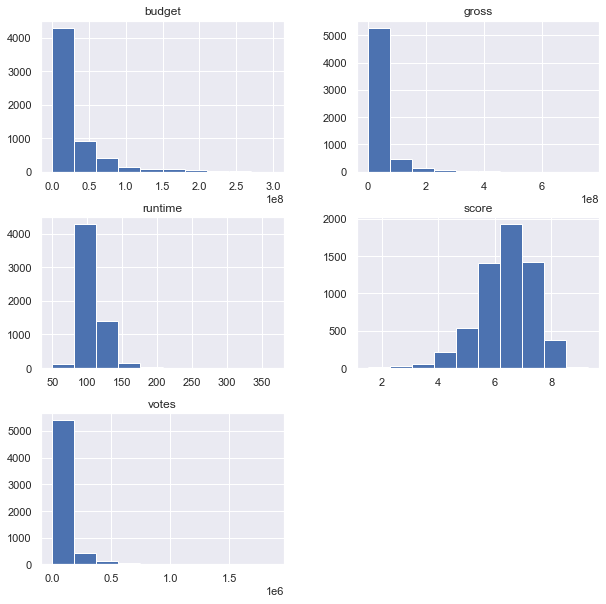

In [44]:
sns.set()
features = ['budget', 'country', 'director', 'genre', 'gross', 'name', 'rating',
            'runtime', 'score', 'star', 'studio', 'votes']

Box_office_v2[features].hist(figsize=(10,10));

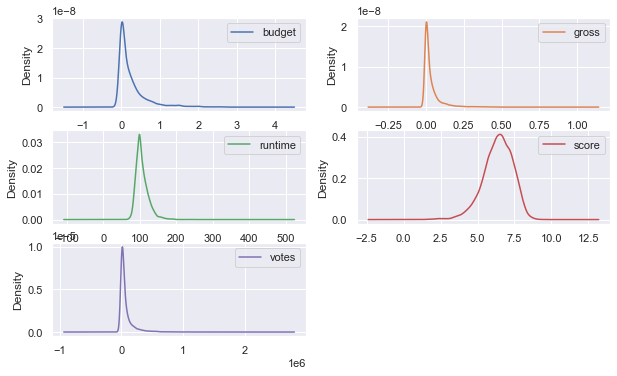

In [45]:
Box_office_v2[features].plot(kind='density', subplots=True, layout=(5, 2), 
                  sharex=False, figsize=(10,10));

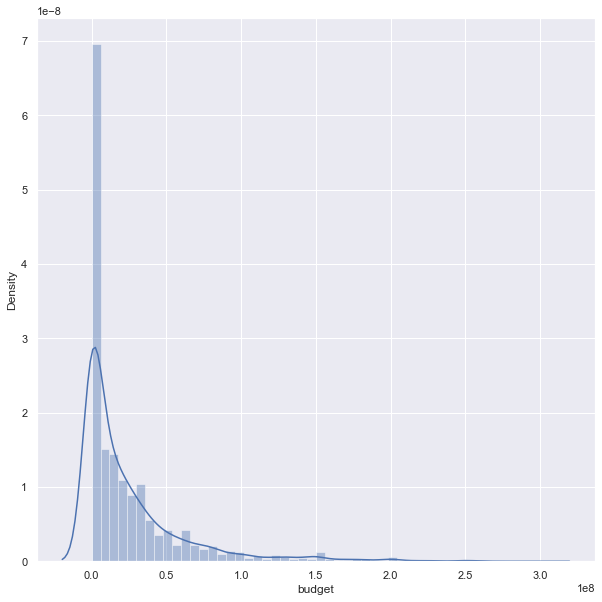

In [46]:
import seaborn as sns
plt.rcParams['figure.figsize'] = 10,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.distplot(Box_office_v2["budget"]) # pass it one variable

# if you are getting warnings related to the package you should use ignore function
import warnings
warnings.filterwarnings ('ignore')

In [47]:
Box_office_v2['Profit_>95%'].value_counts()

0    3049
1    2951
Name: Profit_>95%, dtype: int64

In [48]:
Box_office_v2.describe(include=['object', 'bool', 'category'])

,country,director,genre,name,rating,star,studio,Profit_>95%
count,6000,6000,6000,6000,6000,6000,6000,6000
unique,52,2549,17,6000,13,2317,1996,2
top,USA,Woody Allen,Comedy,El cliente (2016),R,Nicolas Cage,Universal Pictures,0
freq,4281,29,1818,1,3009,38,269,3049


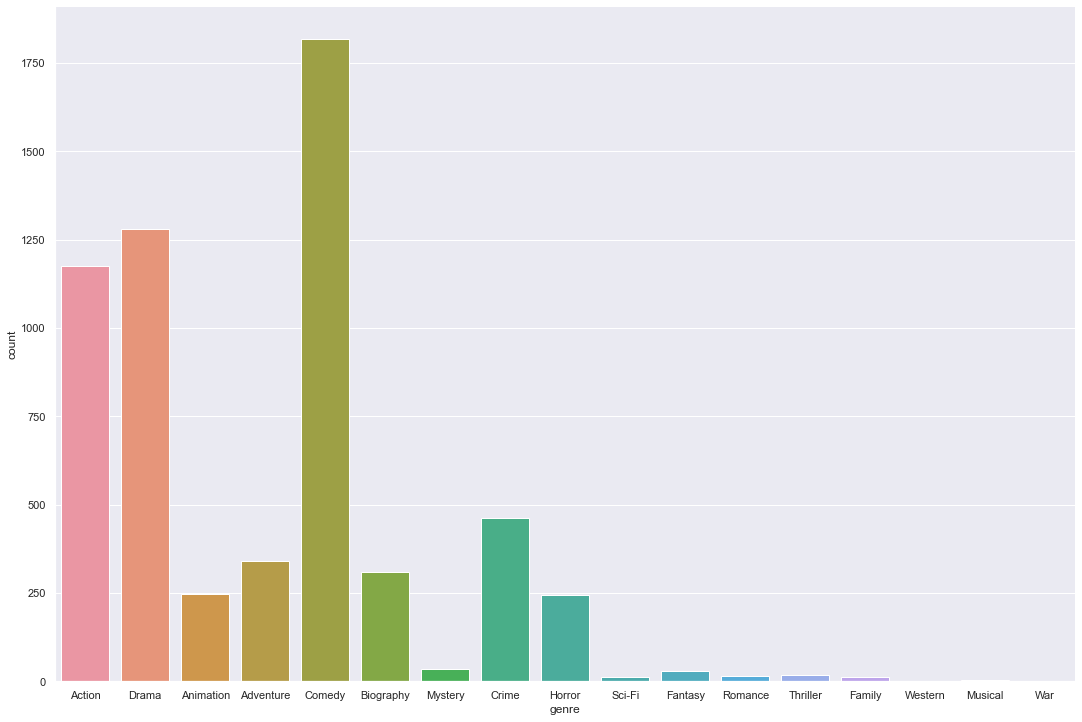

In [49]:
sns.factorplot(x='genre', data=Box_office_v2, kind='count', size=10, aspect=1.5);

In [50]:
Box_office_v2['genre'].value_counts()

Comedy       1818
Drama        1280
Action       1175
Crime         463
Adventure     340
Biography     309
Animation     246
Horror        243
Mystery        34
Fantasy        28
Thriller       17
Romance        14
Sci-Fi         13
Family         12
Musical         4
War             2
Western         2
Name: genre, dtype: int64

In [51]:
#sns.factorplot(x='director', data=Box_office_v2, kind='count', size=10, aspect=1.5);

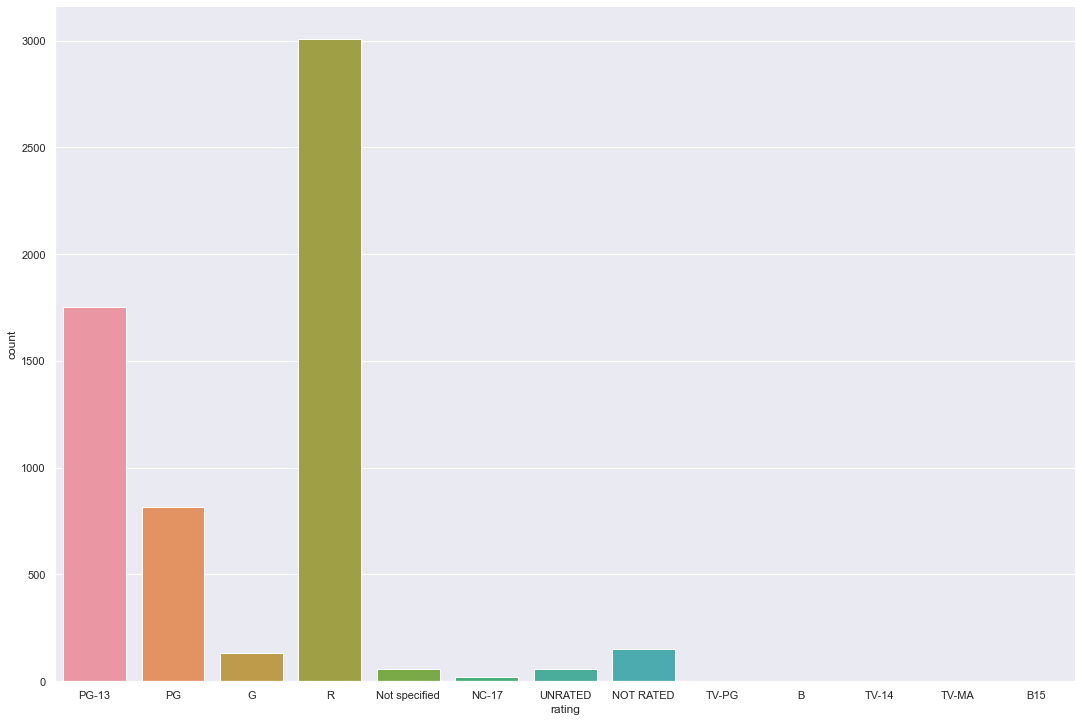

In [52]:
sns.factorplot(x='rating', data=Box_office_v2, kind='count', size=10, aspect=1.5);

In [53]:
Box_office_v2['rating'].value_counts()

R                3009
PG-13            1753
PG                815
NOT RATED         151
G                 133
UNRATED            58
Not specified      56
NC-17              20
B                   1
TV-MA               1
TV-PG               1
B15                 1
TV-14               1
Name: rating, dtype: int64

In [54]:
sns.factorplot(x='country', data=Box_office_v2, kind='count', size=80, aspect=2);

In [55]:
Box_office_v2['country'].value_counts()

USA                               4281
UK                                 615
France                             249
Canada                             126
Germany                            119
Australia                           71
Japan                               59
Spain                               50
Italy                               47
Ireland                             40
Hong Kong                           38
India                               36
Denmark                             31
China                               23
South Korea                         18
Sweden                              17
New Zealand                         17
Belgium                             15
Mexico                              13
Netherlands                         12
Argentina                           10
Russia                              10
Iran                                10
Czech Republic                       8
Norway                               8
Taiwan                   

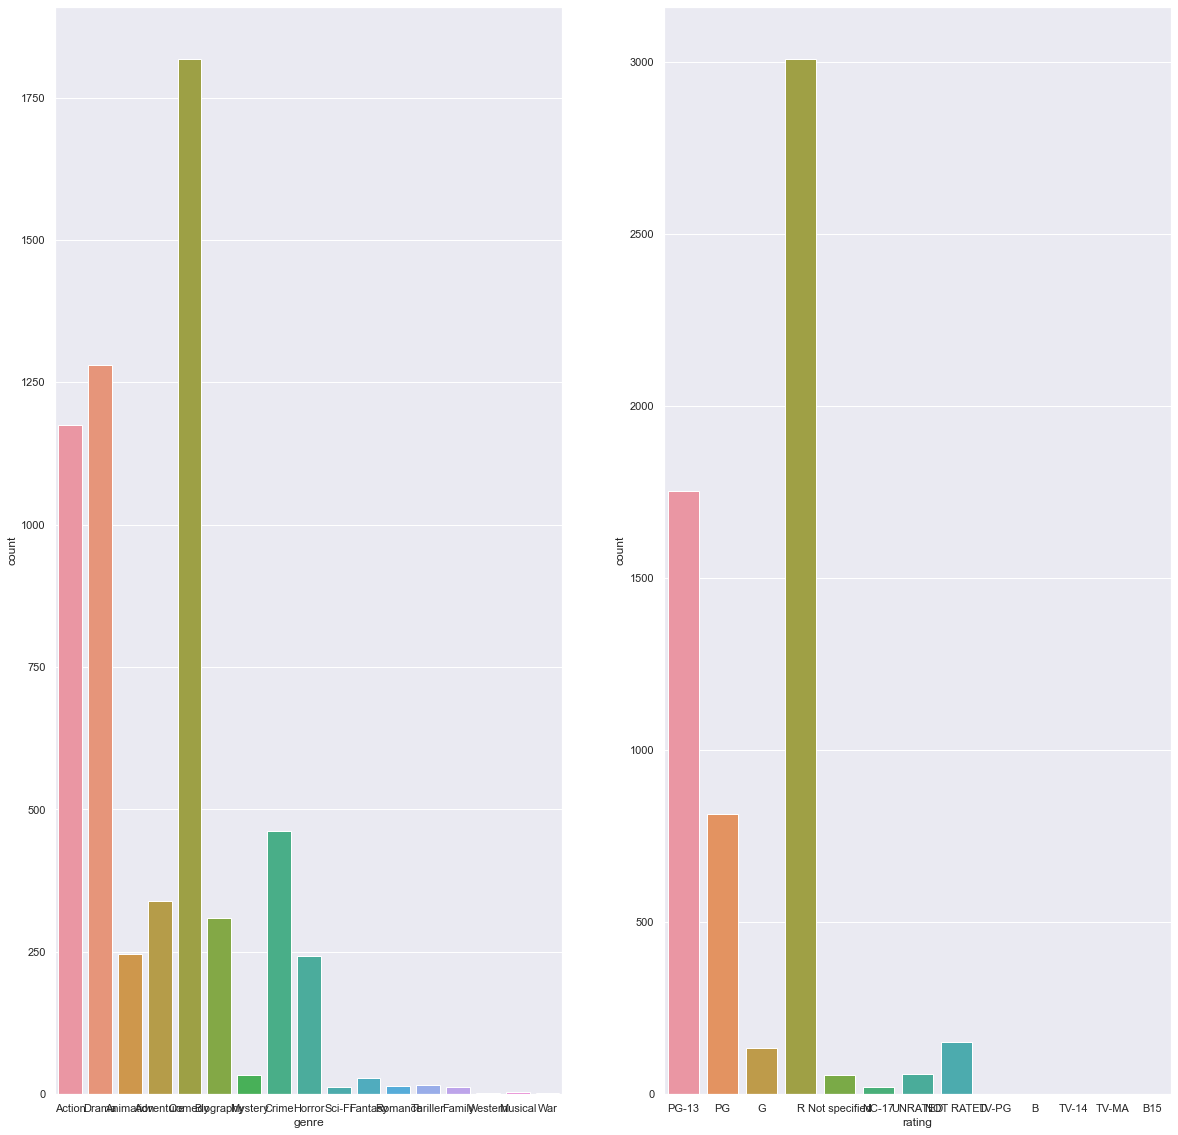

In [56]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='rating', data= Box_office_v2, ax=axes[1]);

In [57]:
#sns.factorplot(x ='Profit_>95%', y = 'genre',  kind = 'bar', data = Box_office_v2, size=10, aspect=1.5);

# TV & Numerical Data

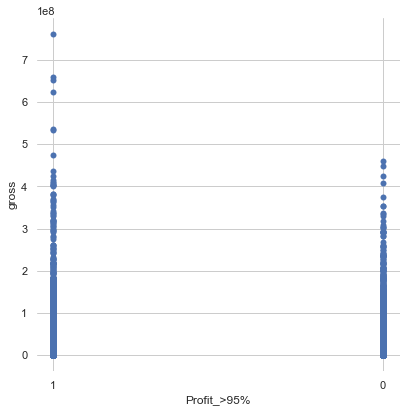

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="Profit_>95%", y="gross",palette="ch:r=-.2,d=.3_r",hue_order=clarity_ranking,sizes=(1, 8),
                linewidth=0,data=Box_office_v2, ax=ax)

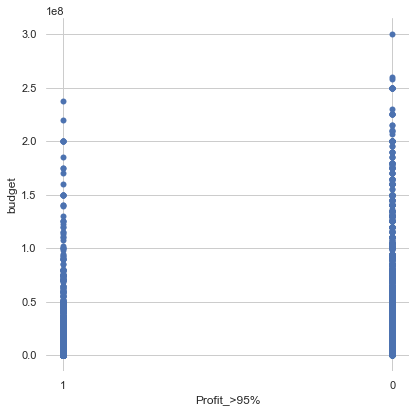

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="Profit_>95%", y="budget",palette="ch:r=-.2,d=.3_r",hue_order=clarity_ranking,sizes=(1, 8),
                linewidth=0,data=Box_office_v2, ax=ax)

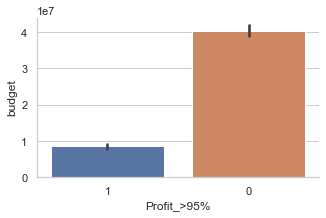

In [60]:
sns.factorplot(x ='Profit_>95%', y = 'budget',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

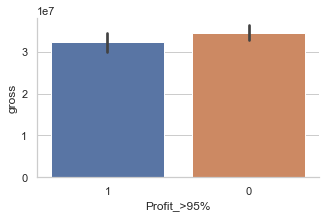

In [61]:
sns.factorplot(x ='Profit_>95%', y = 'gross',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

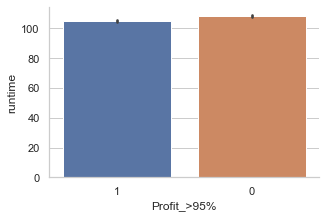

In [62]:
sns.factorplot(x ='Profit_>95%', y = 'runtime',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

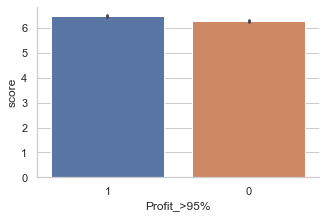

In [63]:
sns.factorplot(x ='Profit_>95%', y = 'score',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

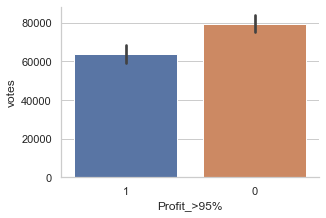

In [64]:
sns.factorplot(x ='Profit_>95%', y = 'votes',  kind = 'bar', data = Box_office_v2, size=3, aspect=1.5);

In [65]:
corr_matrix = Box_office_v2.corr()  
corr_matrix

,budget,gross,runtime,score,votes,Profit,ROI_in_$
budget,1.000000,0.716826,0.264963,0.039169,0.504808,0.096927,-0.020797
gross,0.716826,1.000000,0.224996,0.161371,0.664010,0.763449,0.018822
runtime,0.264963,0.224996,1.000000,0.393470,0.308524,0.075734,-0.023504
score,0.039169,0.161371,0.393470,1.000000,0.393703,0.194065,0.002216
votes,0.504808,0.664010,0.308524,0.393703,1.000000,0.480234,0.012911
Profit,0.096927,0.763449,0.075734,0.194065,0.480234,1.000000,0.043284
ROI_in_$,-0.020797,0.018822,-0.023504,0.002216,0.012911,0.043284,1.000000


In [66]:
Box_office_v2.corr()

,budget,gross,runtime,score,votes,Profit,ROI_in_$
budget,1.000000,0.716826,0.264963,0.039169,0.504808,0.096927,-0.020797
gross,0.716826,1.000000,0.224996,0.161371,0.664010,0.763449,0.018822
runtime,0.264963,0.224996,1.000000,0.393470,0.308524,0.075734,-0.023504
score,0.039169,0.161371,0.393470,1.000000,0.393703,0.194065,0.002216
votes,0.504808,0.664010,0.308524,0.393703,1.000000,0.480234,0.012911
Profit,0.096927,0.763449,0.075734,0.194065,0.480234,1.000000,0.043284
ROI_in_$,-0.020797,0.018822,-0.023504,0.002216,0.012911,0.043284,1.000000


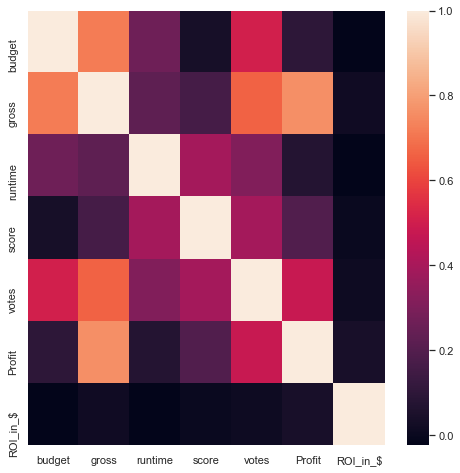

In [67]:
plt.rcParams['figure.figsize'] = 8,8  # control plot sizeimport seaborn as sns
sns.heatmap(Box_office_v2.corr())

In [68]:
Box_office_v2

,budget,country,director,genre,gross,name,rating,runtime,score,star,studio,votes,Profit,ROI_in_$,Profit_>95%
0,237000000.0,UK,James Cameron,Action,760507625.0,Avatar (2009),PG-13,162,7.8,Sam Worthington,Twentieth Century Fox Film Corporation,958400,523507625.0,2.208893,1
1,200000000.0,USA,James Cameron,Drama,658672302.0,Titanic (1997),PG-13,194,7.8,Leonardo DiCaprio,Twentieth Century Fox Film Corporation,865551,458672302.0,2.293362,1
2,150000000.0,USA,Colin Trevorrow,Action,652270625.0,Jurassic World (2015),PG-13,124,7.0,Chris Pratt,Universal Pictures,470625,502270625.0,3.348471,1
3,220000000.0,USA,Joss Whedon,Action,623357910.0,The Avengers (2012),PG-13,143,8.1,Robert Downey Jr.,Marvel Studios,1069292,403357910.0,1.833445,1
4,185000000.0,USA,Christopher Nolan,Action,534858444.0,The Dark Knight (2008),PG-13,152,9.0,Christian Bale,Warner Bros.,1845853,349858444.0,1.891127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,UK,Dominic Anciano,Comedy,1143.0,"Love, Honor and Obey (2000)",R,103,6.5,Sadie Frost,British Broadcasting Corporation (BBC),4557,1143.0,inf,1
5996,0.0,Ireland,Ian Fitzgibbon,Action,828.0,Perrier's Bounty (2009),R,88,6.4,Gabriel Byrne,Parallel Film Productions,5540,828.0,inf,1
5997,0.0,Norway,Petter Næss,Action,547.0,Into the White (2012),R,104,7.2,Florian Lukas,Zentropa International Norway,16674,547.0,inf,1
5998,0.0,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride (2011),PG,89,6.2,Kelly Macdonald,Isle of Man Film,9055,542.0,inf,1


In [69]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       6000 non-null   float64
 1   country      6000 non-null   object 
 2   director     6000 non-null   object 
 3   genre        6000 non-null   object 
 4   gross        6000 non-null   float64
 5   name         6000 non-null   object 
 6   rating       6000 non-null   object 
 7   runtime      6000 non-null   int64  
 8   score        6000 non-null   float64
 9   star         6000 non-null   object 
 10  studio       6000 non-null   object 
 11  votes        6000 non-null   int64  
 12  Profit       6000 non-null   float64
 13  ROI_in_$     6000 non-null   float64
 14  Profit_>95%  6000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 703.2+ KB


In [70]:
 Box_office_v2['Profit_>95%'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
5995    1
5996    1
5997    1
5998    1
5999    1
Name: Profit_>95%, Length: 6000, dtype: int32

In [71]:
Box_office_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       6000 non-null   float64
 1   country      6000 non-null   object 
 2   director     6000 non-null   object 
 3   genre        6000 non-null   object 
 4   gross        6000 non-null   float64
 5   name         6000 non-null   object 
 6   rating       6000 non-null   object 
 7   runtime      6000 non-null   int64  
 8   score        6000 non-null   float64
 9   star         6000 non-null   object 
 10  studio       6000 non-null   object 
 11  votes        6000 non-null   int64  
 12  Profit       6000 non-null   float64
 13  ROI_in_$     6000 non-null   float64
 14  Profit_>95%  6000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 703.2+ KB


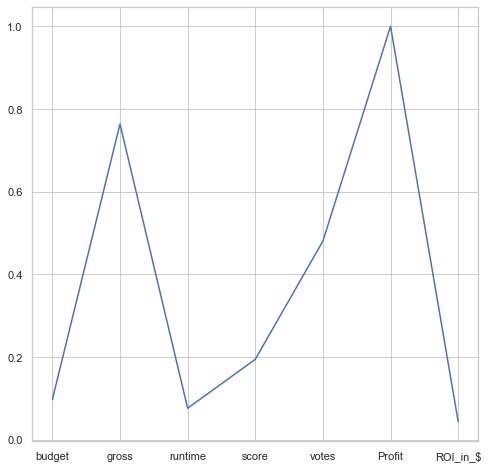

In [72]:
Box_office_v2.corr()['Profit'].plot()

In [73]:
!pip show pandas
!pip install pandas --upgrade
!pip show pandas

Name: pandas
Version: 1.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: visions, statsmodels, seaborn, phik, pandas-datareader
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.2
    Uninstalling pandas-1.2.2:
      Successfully uninstalled pandas-1.2.2


ERROR: phik 0.11.1 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~-ndas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Name: pandas
Version: 1.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: pytz, python-dateutil, numpy
Required-by: visions, statsmodels, seaborn, phik, pandas-datareader


ValueError: Axis limits cannot be NaN or Inf

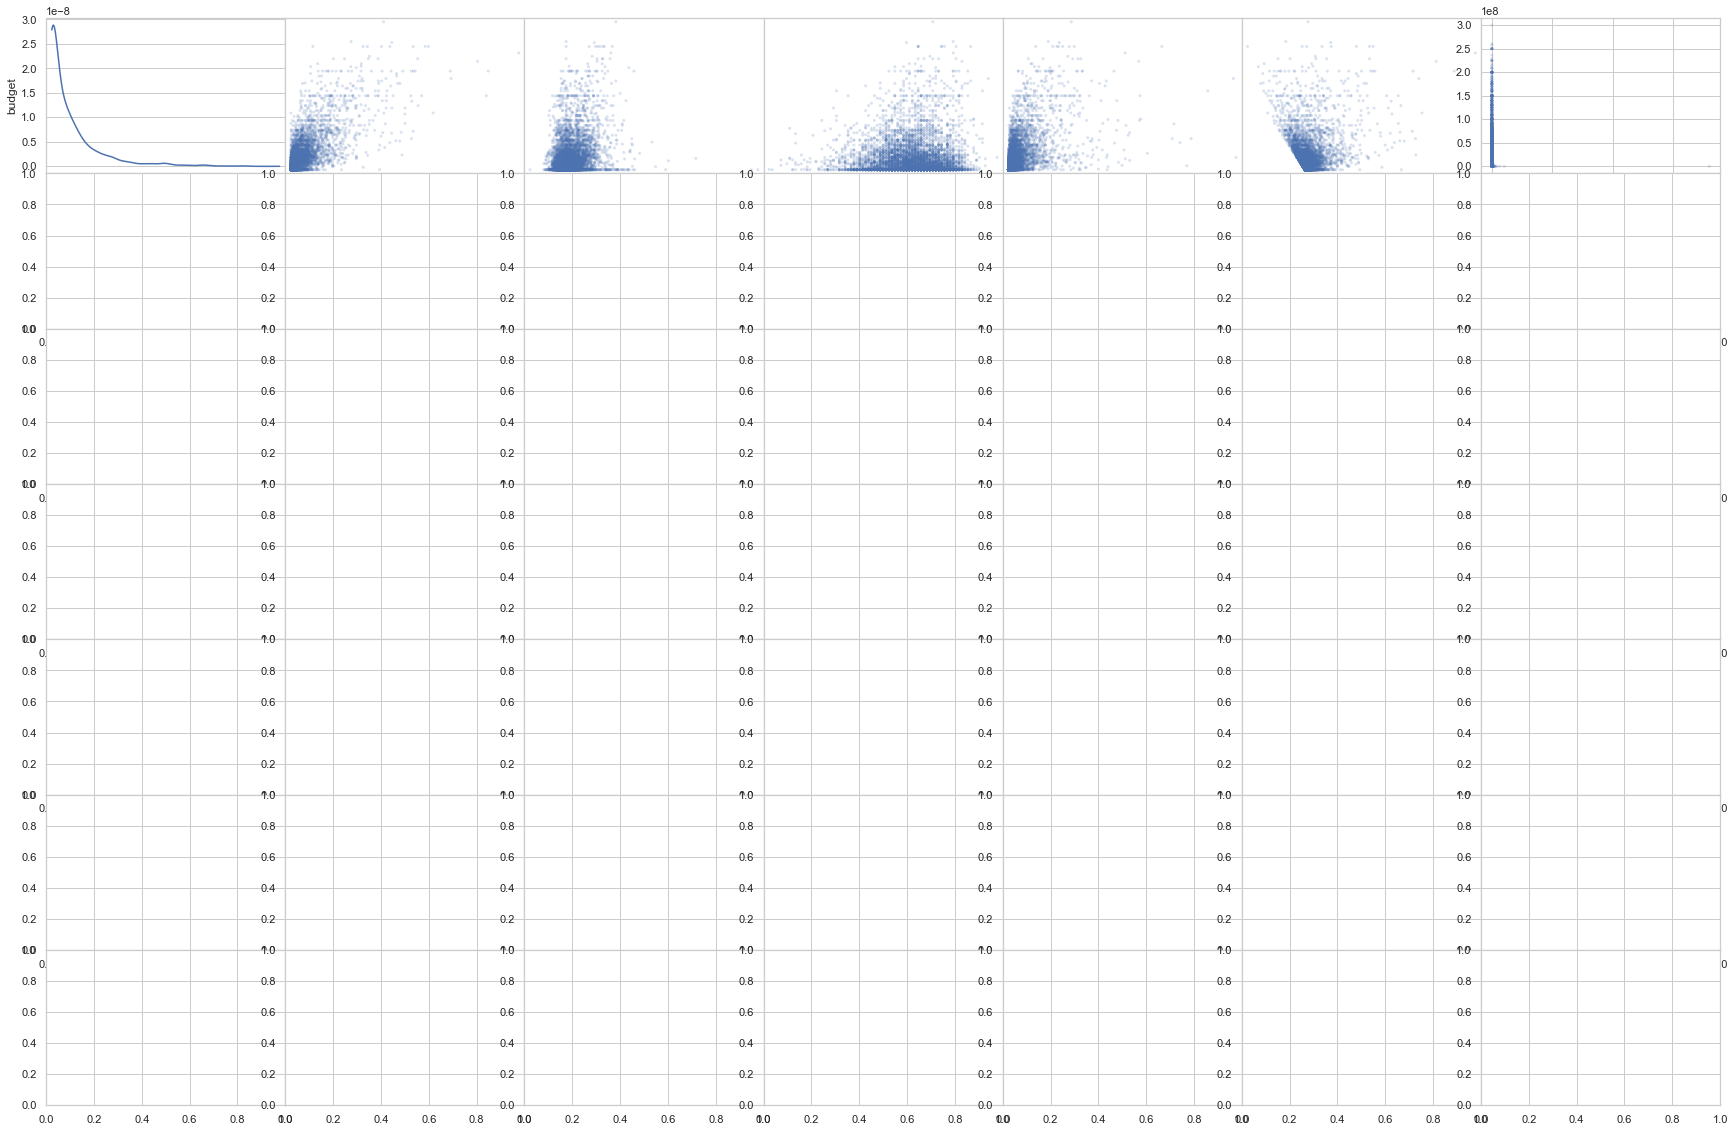

In [74]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(Box_office_v2, alpha=0.2, figsize=(30, 20), diagonal='kde')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
Box_office_v2.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = 20,20  # control plot size

Box_office_v2.hist()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = 5,5

plt.scatter(Box_office_v2['Profit'], Box_office_v2['budget']);

In [ ]:
sns.jointplot(x='Profit', y='gross', 
              data= Box_office_v2, kind='scatter');

In [ ]:
sns.jointplot(x='budget', y='gross', 
              data=Box_office_v2, kind='scatter');

In [ ]:
sns.jointplot('Profit', 'score', data=Box_office_v2,
              kind="scatter", color="g");

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(Box_office_v2);

In [ ]:
plt.rcParams['figure.figsize'] = 20,20  # control plot size

Box_office_v2.hist()
plt.show()

In [ ]:
!pip install pandas_profiling
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(Box_office_v2, title='Pandas Profiling Report', explorative=True)

In [ ]:
profile

# plotting categorical data with TV

In [ ]:
Box_office_v2.info()

In [ ]:
sns.catplot(x="Profit_>95%", y="genre", data=Box_office_v2)

In [ ]:
CrosstabResult = pd.crosstab(index = Box_office_v2['genre'], columns = Box_office_v2['Profit_>95%'])
print(CrosstabResult)

In [ ]:
sns.catplot(x="Profit_>95%", y="director", data=Box_office_v2)

In [ ]:
CrosstabResult = pd.crosstab(index = Box_office_v2['director'], columns = Box_office_v2['Profit_>95%'])
print(CrosstabResult)

In [ ]:
sns.catplot(x="Profit_>95%", y="country", data=Box_office_v2)

In [ ]:
CrosstabResult = pd.crosstab(index = Box_office_v2['country'], columns = Box_office_v2['Profit_>95%'])
print(CrosstabResult)

In [ ]:
sns.catplot(x="Profit_>95%", y="rating", data=Box_office_v2)

In [ ]:
CrosstabResult = pd.crosstab(index = Box_office_v2['rating'], columns = Box_office_v2['Profit_>95%'])
print(CrosstabResult)

In [ ]:
sns.catplot(x="Profit_>95%", y="star", data=Box_office_v2)

In [ ]:
CrosstabResult = pd.crosstab(index = Box_office_v2['star'], columns = Box_office_v2['Profit_>95%'])
print(CrosstabResult)

In [ ]:
sns.catplot(x="Profit_>95%", y="studio", data=Box_office_v2)

In [ ]:
CrosstabResult = pd.crosstab(index = Box_office_v2['studio'], columns = Box_office_v2['Profit_>95%'])
print(CrosstabResult)

# Level Down COUNTRY

In [ ]:
Box_office_v2['country'].value_counts()

In [ ]:
Box_office_v2.loc[Box_office_v2['country'] != 'USA', ['country']] = 'non-USA'

Box_office_v2['country'].unique()
Box_office_v2['country'].value_counts()

In [ ]:
sns.factorplot(x ='country', y = 'Profit',  kind = 'bar', data = Box_office_v2, size=5, aspect=1);

# Level down RATING

In [ ]:
Box_office_v2['rating'].value_counts()

In [ ]:
Box_office_v2 = Box_office_v2.replace(to_replace =["PG-13","PG","G","TV-PG"] ,  value ="PG")
Box_office_v2 = Box_office_v2.replace(to_replace =["TV-14","B15"] ,  value ="Youth")
Box_office_v2 = Box_office_v2.replace(to_replace =["Not specified","UNRATED","NOT RATED","B"] ,  value ="NR")
Box_office_v2 = Box_office_v2.replace(to_replace =["R","TV-MA","NC-17"] ,  value ="R")

In [ ]:
Box_office_v2['rating'].value_counts()

# Level down Genre

In [ ]:
Box_office_v2['genre'].value_counts()

In [ ]:
Box_office_v2 = Box_office_v2.replace(to_replace =["Crime","Adventure","Biography","Animation","Horror","Mystery",
                                                   "Fantasy","Thriller","Romance","Sci-Fi","Family","Musical",
                                                   "War","Western"], value ="Others")


In [ ]:
Box_office_v2['genre'].value_counts()

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='rating', data= Box_office_v2, ax=axes[1]);

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.countplot(x='genre', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='country', data= Box_office_v2, ax=axes[1]);

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.countplot(x='rating', data= Box_office_v2, ax=axes[0]);
sns.countplot(x='country', data= Box_office_v2, ax=axes[1]);

In [ ]:
Box_office_v2

In [ ]:
Box_office_v2.info()